In [2]:
from nba_api.stats.endpoints import leagueleaders
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from nba_api.stats.endpoints import leaguedashplayerstats
from nba_api.stats.endpoints import teamyearbyyearstats, playercareerstats, synergyplaytypes

from matplotlib.offsetbox import OffsetImage, AnnotationBbox, DrawingArea, TextArea
from matplotlib.patches import Circle, FancyArrowPatch, FancyArrow, ArrowStyle, Arrow
import matplotlib.ticker as mtick
import time
from tqdm import tqdm
from sklearn.cluster import KMeans
import numpy as np



from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.style.use('fivethirtyeight')

/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_31342/2376038388.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [128]:
# isolation_players = synergyplaytypes.SynergyPlayTypes(league_id='00', per_mode_simple='PerGame', 
#                                                       player_or_team_abbreviation='P',
#                                                       season_type_all_star='Playoffs',
#                                                       season='2022-23',
#                                                       play_type_nullable='Isolation',
#                                                       type_grouping_nullable='offensive').get_data_frames()[0]


isolation_players = synergyplaytypes.SynergyPlayTypes(league_id='00', per_mode_simple='PerGame', 
                                                      player_or_team_abbreviation='P',
                                                      season_type_all_star='Regular Season',
                                                      season='2022-23',
                                                      play_type_nullable='Isolation',
                                                      type_grouping_nullable='offensive').get_data_frames()[0]


In [129]:
for column in filtered_isolation_players.columns:
    print(column)

SEASON_ID
PLAYER_ID
PLAYER_NAME
TEAM_ID
TEAM_ABBREVIATION
TEAM_NAME
PLAY_TYPE
TYPE_GROUPING
PERCENTILE
GP
POSS_PCT
PPP
FG_PCT
FT_POSS_PCT
TOV_POSS_PCT
SF_POSS_PCT
PLUSONE_POSS_PCT
SCORE_POSS_PCT
EFG_PCT
POSS
PTS
FGM
FGA
FGMX


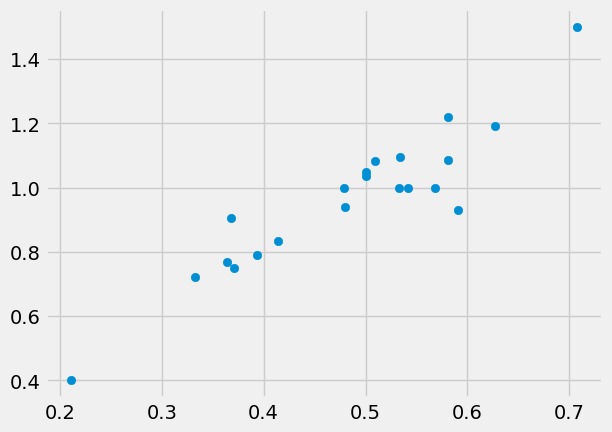

In [130]:
plt.scatter(filtered_isolation_players['EFG_PCT'], filtered_isolation_players['PPP'])

1. Damian Lillard: 3.6 FGA/G 55.0 EFG 1.2 PPP
2. DeMar DeRozan: 2.6 FGA/G 49.7 EFG 1.2 PPP
3. Luka Doncic: 5.5 FGA/G 53.2 EFG 1.1 PPP
4. Donovan Mitchell: 2.1 FGA/G 53.9 EFG 1.1 PPP
5. Jalen Brunson: 2.5 FGA/G 54.5 EFG 1.1 PPP
6. James Harden: 4.8 FGA/G 49.1 EFG 1.1 PPP
7. Zach LaVine: 2.3 FGA/G 55.0 EFG 1.1 PPP
8. De'Aaron Fox: 2.0 FGA/G 54.4 EFG 1.1 PPP
9. Joel Embiid: 4.9 FGA/G 50.9 EFG 1.1 PPP
10. Shai Gilgeous-Alexander: 4.9 FGA/G 47.5 EFG 1.1 PPP
11. Jimmy Butler: 2.3 FGA/G 47.6 EFG 1.1 PPP
12. Bam Adebayo: 1.9 FGA/G 48.9 EFG 1.0 PPP
13. Kevin Porter Jr.: 2.5 FGA/G 46.6 EFG 1.0 PPP
14. Kawhi Leonard: 3.3 FGA/G 50.3 EFG 1.0 PPP
15. Pascal Siakam: 2.9 FGA/G 48.5 EFG 1.0 PPP
16. Spencer Dinwiddie: 3.2 FGA/G 45.6 EFG 1.0 PPP
17. Jamal Murray: 1.7 FGA/G 49.1 EFG 1.0 PPP
18. Julius Randle: 3.6 FGA/G 49.3 EFG 1.0 PPP
19. Jalen Green: 2.1 FGA/G 46.0 EFG 0.9 PPP
20. Trae Young: 2.6 FGA/G 44.0 EFG 0.9 PPP
21. Anthony Edwards: 3.8 FGA/G 48.0 EFG 0.9 PPP
22. Jayson Tatum: 3.6 FGA/G 42.2 EFG 

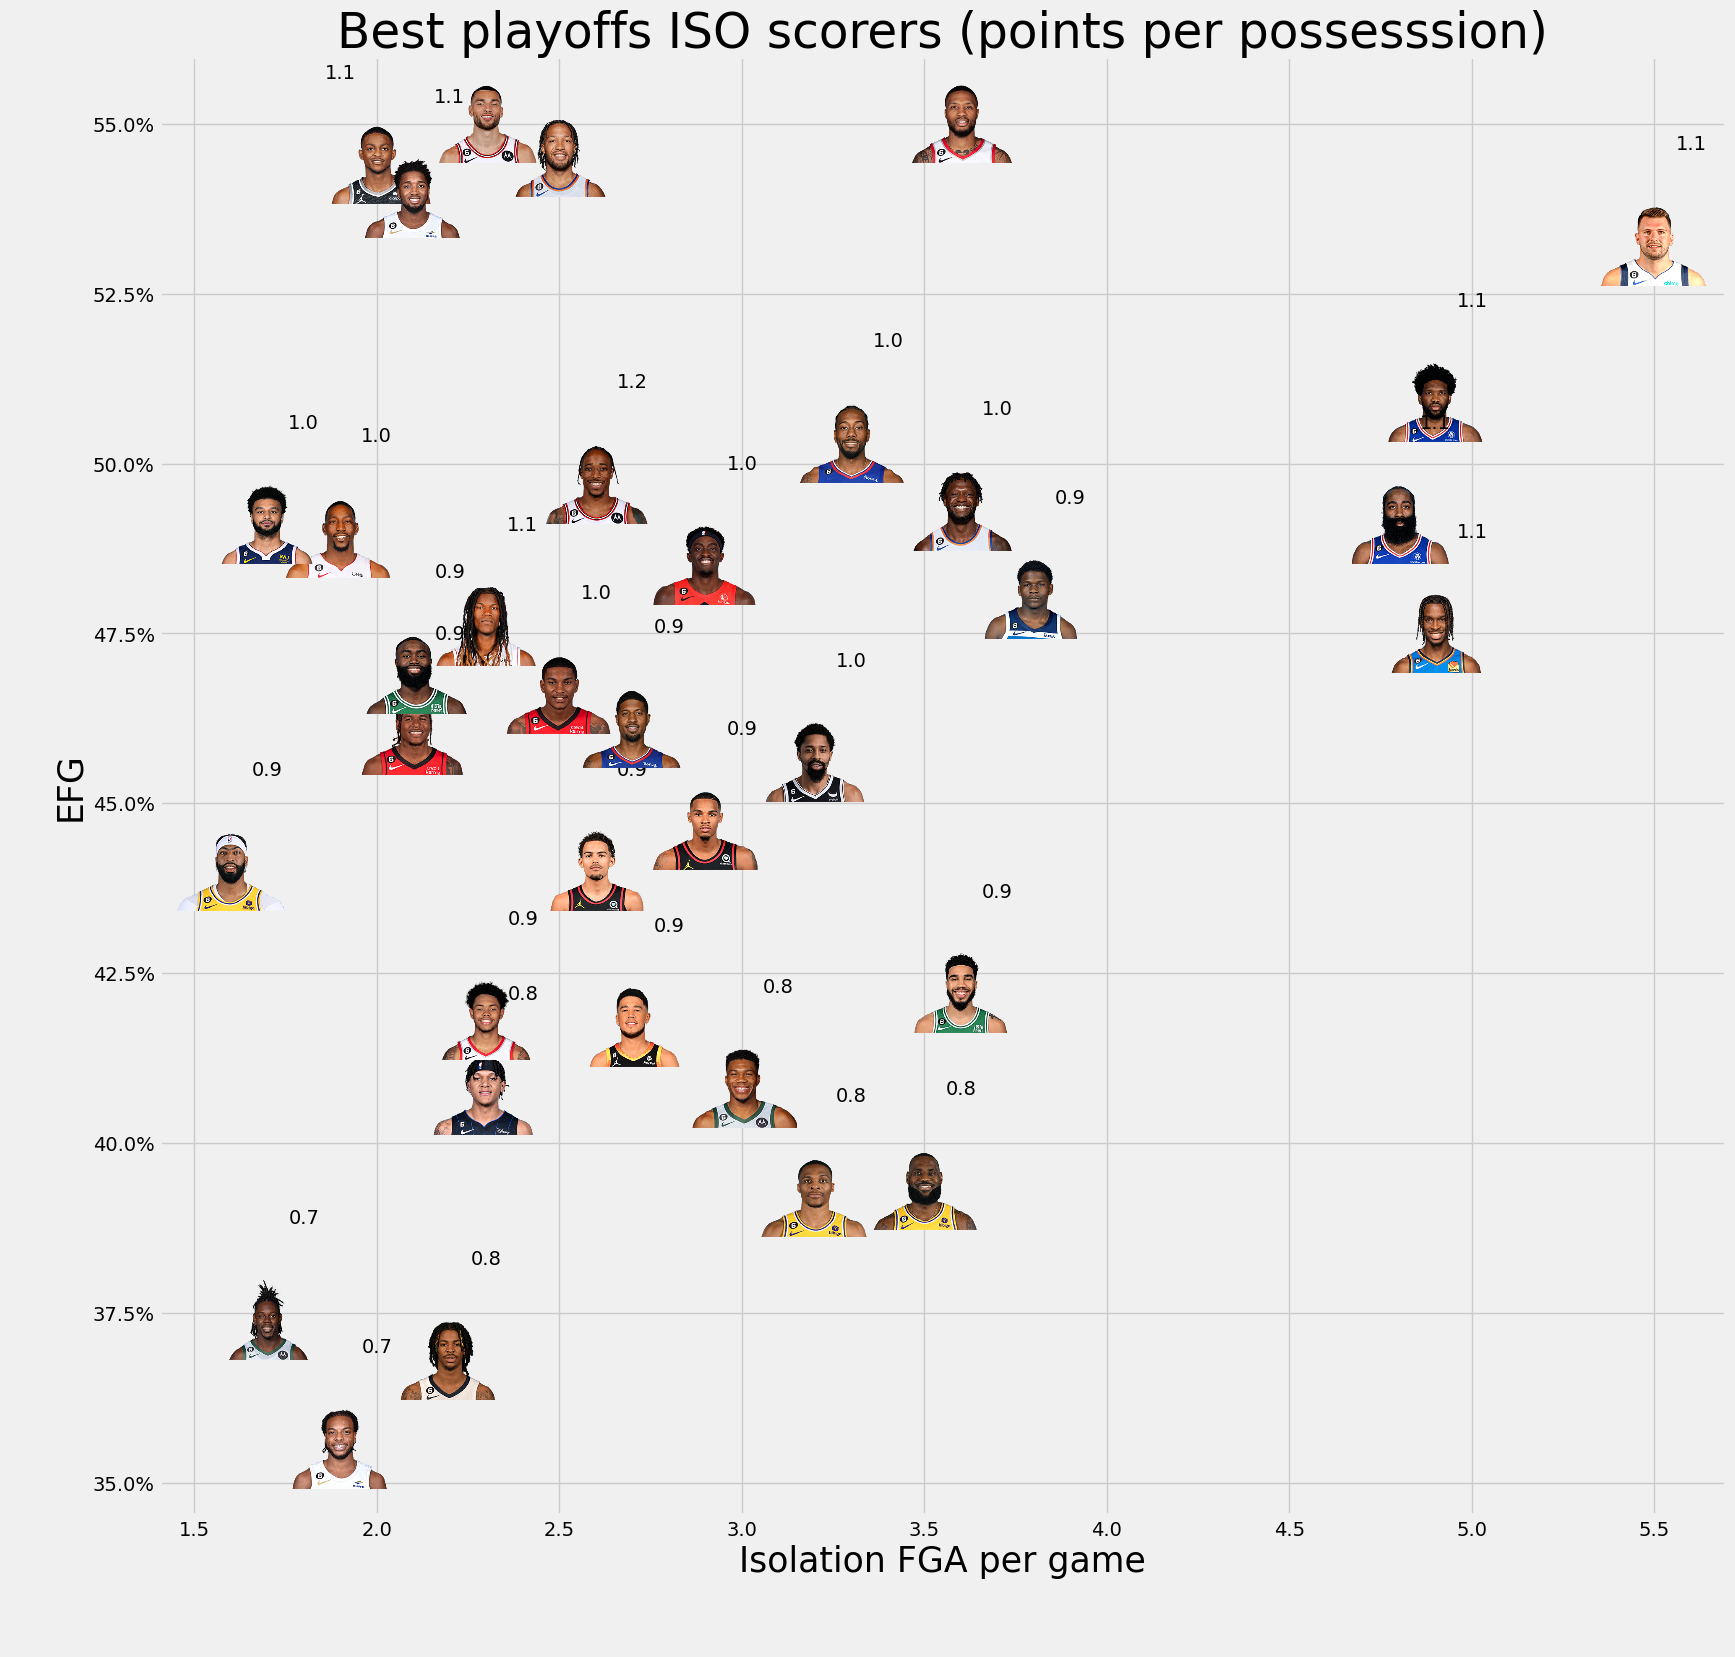

In [134]:
filtered_isolation_players = isolation_players[(isolation_players['FGA'] > 1.5) & (isolation_players['FGM'] > 0.5) & (isolation_players['GP'] > 50)]

# filtered_isolation_players

zoom = 0.3
player_root_dir = 'player_imgs/'

def get_player_img(player_id):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)

fig, ax = plt.subplots(figsize=(18, 18))

get_value_x = lambda x: x.FGA

get_value_y = lambda x: x.EFG_PCT * 100

players_list = []

for i in range(len(filtered_isolation_players)):
    item = filtered_isolation_players.iloc[i]
    item_x = get_value_x(item)
    item_y = get_value_y(item)
    
    player_id = item.PLAYER_ID
    player_name = item.PLAYER_NAME
    player_ppp = item.PPP
    
    ax.scatter(item_x, item_y, color='r', s=10)
    
    ab = AnnotationBbox(get_player_img(player_id), (item_x, item_y), frameon=False)
    ax.add_artist(ab)
    
    if player_id == 1628368:
        ab = AnnotationBbox(TextArea(f'{np.round(player_ppp, 1)}'), (item_x - 0.1, item_y + 1.35), frameon=False)
    else:
        ab = AnnotationBbox(TextArea(f'{np.round(player_ppp, 1)}'), (item_x + 0.1, item_y + 1.5), frameon=False)
    ax.add_artist(ab)
    
    # if player_ppp > 1.05:
    #     print(f'{player_name} {item_x} FGA/G {np.round(item_y, 2)} EFG {np.round(player_ppp, 1)} PPP')
        
    players_list.append([player_name, item_x, item_y, player_ppp])
    
players_list = sorted(players_list, key = lambda x: x[-1], reverse=True)

for i, (player_name, item_x, item_y, player_ppp) in enumerate(players_list):
    print(f'{i+1}. {player_name}: {item_x} FGA/G {np.round(item_y, 2)} EFG {np.round(player_ppp, 1)} PPP')
    
ax.set_xlabel("Isolation FGA per game", fontsize=25)
ax.set_ylabel("EFG", fontsize=25)
# ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Best playoffs ISO scorers (points per possesssion)", fontdict={'fontsize': 35})
# ab = AnnotationBbox(OffsetImage(plt.imread(f'twitter_logo (1).png'), zoom=0.1), (6.35, 72.2), frameon=False)
# ax.add_artist(ab)
# ax.text(x=6.7, y=72, ha='right', s='@FHuzjan', size=15)

plt.savefig('best_iso_scorer_regular.png', bbox_inches='tight')